# 1) Setup


In [1]:
# Run the following command to instal via Docker Container
# sudo docker run -p 8888:8888 -v $(pwd)/home/tayo/work/ jupyter/tensorflow-notebook

# 2) Preparing the Data

## Import

In [2]:
#make sure to locally have pandas installed, perhaps [pip install pandas] 
#Might want to also install matplotlib for later [pip install matplotlib]
import pandas as pd

In [3]:
# Read in the CSV file
original_data = pd.read_csv("car-data.csv")

In [4]:
# PReview the imported records
original_data

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,1,82,ford,mustang gl
394,44.0,4,97.0,52,2130,24.6,2,82,vw,pickup
395,32.0,4,135.0,84,2295,11.6,1,82,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,1,82,ford,ranger


In [5]:
# View the first 3 records
original_data.head()

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [6]:
original_data.tail(3)

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
395,32.0,4,135.0,84,2295,11.6,1,82,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,1,82,ford,ranger
397,31.0,4,119.0,82,2720,19.4,1,82,chevy,s-10


In [7]:
original_data.iloc[10]

mpg                 15.0
cyl                    8
disp               383.0
hp                   170
wgt                 3563
acc                 10.0
country                1
year                  70
make               dodge
model      challenger se
Name: 10, dtype: object

## Cleanup / Validation

In [8]:
#Make a copy of my imported data

In [9]:
data = original_data.copy()

In [10]:
data.head()

,mpg,cyl,disp,hp,wgt,acc,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [11]:
# Rename Column
cols = {"cyl": "cylinders",
        "disp": "displacement",
        "hp": "horsepower",
        "wgt": "weight",
        "acc": "acceleration"
       }
data = data.rename(columns = cols)
        

In [12]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,70,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,70,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,70,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,70,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,70,ford,torino


In [13]:
# Look for null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
country         0
year            0
make            0
model           2
dtype: int64

In [14]:
# View data types
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
country           int64
year              int64
make             object
model            object
dtype: object

In [15]:
data.iloc[32]

mpg              25.0
cylinders           4
displacement     98.0
horsepower          ?
weight           2046
acceleration     19.0
country             1
year               71
make             ford
model           pinto
Name: 32, dtype: object

In [16]:
data.replace(to_replace="?", value=None, inplace=True)

In [17]:
data = data.dropna()

In [18]:
# convert horsepower to int
data['horsepower'] = data ['horsepower'].astype(int)

In [19]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
country           int64
year              int64
make             object
model            object
dtype: object

In [20]:
# format year
data["year"] = data["year"].add(1900)

In [21]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,1970,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1,1970,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,1,1970,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,1,1970,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,1,1970,ford,torino


## 3) Feature selection and Feature Engineering

In [22]:
data.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,country,year,make,model
0,18.0,8,307.0,130,3504,12.0,1,1970,chevrolet,chevelle malibu


In [23]:
# Drop make and model
data = data.drop("make", axis=1)
data = data.drop("model", axis=1)

In [24]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,country,year
0,18.0,8,307.0,130,3504,12.0,1,1970
1,15.0,8,350.0,165,3693,11.5,1,1970
2,18.0,8,318.0,150,3436,11.0,1,1970


In [25]:
# Change country to on hot encoding ( only 1 bit in a group of bit can be 1)
data['country'] = data['country'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
data = pd.get_dummies(data, columns=['country'], prefix='', prefix_sep='')

In [26]:
# I geat direct booleans instead of 001. Change in functions used since demo vid? Nov 24, 2023
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,Europe,Japan,USA
0,18.0,8,307.0,130,3504,12.0,1970,False,False,True
1,15.0,8,350.0,165,3693,11.5,1970,False,False,True
2,18.0,8,318.0,150,3436,11.0,1970,False,False,True
3,16.0,8,304.0,150,3433,12.0,1970,False,False,True
4,17.0,8,302.0,140,3449,10.5,1970,False,False,True


In [27]:
# Pairwise correlation
data.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,Europe,Japan,USA
mpg,1.000000,-0.777254,-0.804760,-0.777768,-0.831764,0.422076,0.579658,0.246606,0.449369,-0.563736
cylinders,-0.777254,1.000000,0.950638,0.842898,0.897210,-0.504300,-0.345426,-0.355225,-0.400235,0.608541
displacement,-0.804760,0.950638,1.000000,0.897275,0.932769,-0.543423,-0.369486,-0.374646,-0.437174,0.654213
horsepower,-0.777768,0.842898,0.897275,1.000000,0.864284,-0.688670,-0.415064,-0.286980,-0.319117,0.488148
weight,-0.831764,0.897210,0.932769,0.864284,1.000000,-0.415836,-0.307805,-0.296699,-0.444370,0.598945
acceleration,0.422076,-0.504300,-0.543423,-0.688670,-0.415836,1.000000,0.288478,0.209536,0.112154,-0.256880
year,0.579658,-0.345426,-0.369486,-0.415064,-0.307805,0.288478,1.000000,-0.036896,0.198186,-0.134272
Europe,0.246606,-0.355225,-0.374646,-0.286980,-0.296699,0.209536,-0.036896,1.000000,-0.227929,-0.597345
Japan,0.449369,-0.400235,-0.437174,-0.319117,-0.444370,0.112154,0.198186,-0.227929,1.000000,-0.644722
USA,-0.563736,0.608541,0.654213,0.488148,0.598945,-0.256880,-0.134272,-0.597345,-0.644722,1.000000


<Axes: xlabel='weight', ylabel='mpg'>

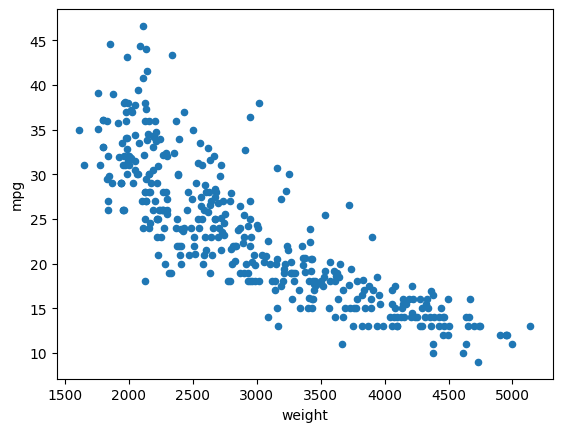

In [28]:
# Graph Weight vs MPG
#this is where you need matplotlib installed
data.plot(kind="scatter", x="weight", y="mpg")

<Axes: xlabel='displacement', ylabel='mpg'>

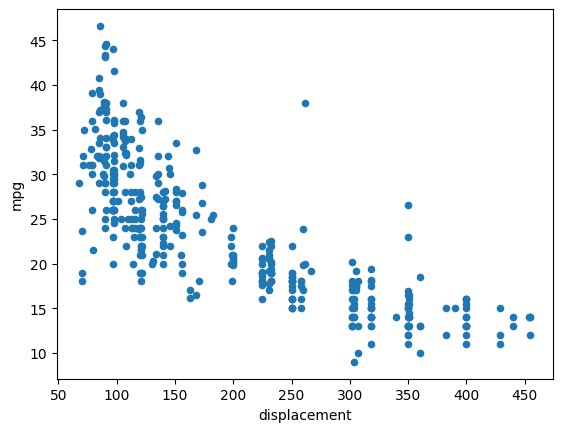

In [29]:
# Graph displacement vs MPG
data.plot(kind="scatter", x="displacement", y="mpg")

<Axes: xlabel='horsepower', ylabel='mpg'>

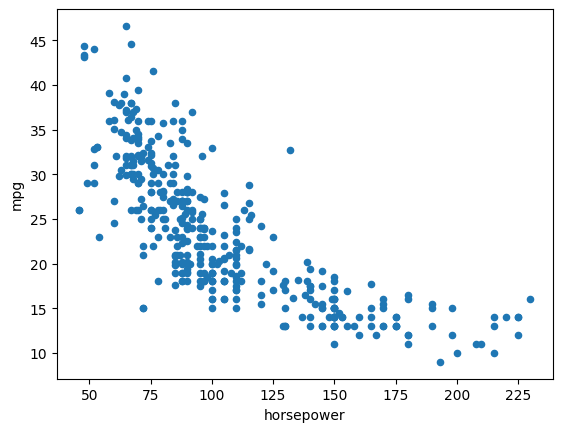

In [30]:
# Graph horsepower vs MPG
data.plot(kind="scatter", x="horsepower", y="mpg")

<Axes: xlabel='cylinders', ylabel='mpg'>

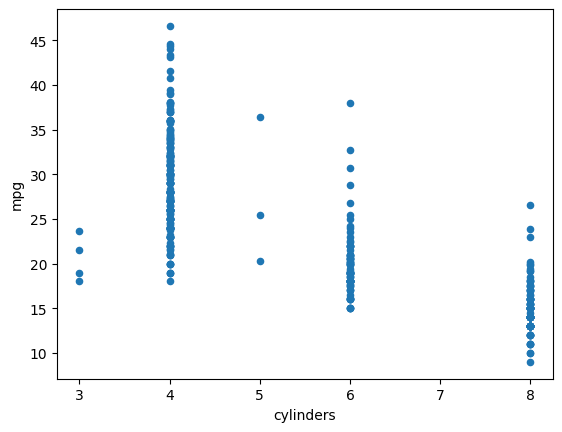

In [31]:
# Graph cylinders vs MPG
data.plot(kind="scatter", x="cylinders", y="mpg")

In [32]:
# Check for class imbalance
print("USA: ", data["USA"].sum())
print("Europe: ", data["Europe"].sum())
print("Japan: ", data["Japan"].sum())

USA:  245
Europe:  68
Japan:  77


In [33]:
#drop country fields since there is a weak correlation between countries and a desire to avoid class imbalance
data = data.drop("USA", axis=1)
data = data.drop("Europe", axis=1)
data = data.drop("Japan", axis=1)


In [34]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


## 4) Model Training and Evaluation

### Data split (training vs testing)

In [35]:
data.shape

(390, 7)

In [36]:
# Training
training_data=data.head(310)

# Testing data
testing_data = data.tail(80)

In [37]:
training_data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
308,33.5,4,151.0,90,2556,13.2,1979
309,41.5,4,98.0,76,2144,14.7,1980
310,38.1,4,89.0,60,1968,18.8,1980
311,32.1,4,98.0,70,2120,15.5,1980
312,37.2,4,86.0,65,2019,16.4,1980


In [38]:
testing_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
313,28.0,4,151.0,90,2678,16.5,1980
314,26.4,4,140.0,88,2870,18.1,1980
315,24.3,4,151.0,90,3003,20.1,1980
316,19.1,6,225.0,90,3381,18.7,1980
317,34.3,4,97.0,78,2188,15.8,1980


In [39]:
# Model 1 Linear regression with a single feature

In [40]:
# y = mx + b
# x = horsepower
# y = mpg

In [41]:
#import libraries
#tensorflow and numpy need to be installed by this point
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2023-11-28 08:52:30.997833: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 08:52:31.001778: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 08:52:31.092036: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 08:52:31.093292: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 08:52:31.851797: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

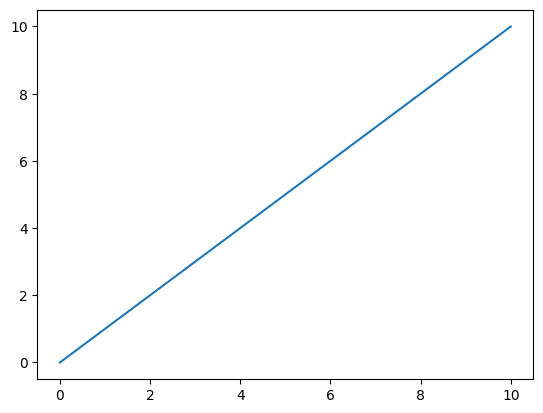

In [42]:
# test graphs
x = np.linspace(0, 10)
plt.plot(x, x+0)


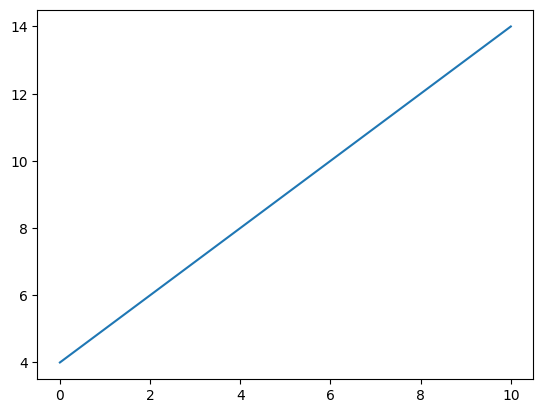

In [43]:
plt.plot(x, x+4)

In [44]:
# Define first model
model1 = tf.keras.Sequential()

2023-11-28 08:52:33.322657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-28 08:52:33.323072: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [45]:
# Define laters
# Layer 1
layer1= tf.keras.layers.Dense(1, input_shape=(1, ))

#add layers to model
model1.add(layer1)


In [46]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install graphviz

     |████████████████████████████████| 47 kB 2.0 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [49]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [50]:
#!conda install graphviz -y  #standard solution to graphviz not found error caused while running the from previous step

In [51]:
#!conda install pydot_ng -y # stack overflow solution previously graphviz -y was still not being found after last command was run

In [52]:
#compile model1
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [53]:
# Train Model1
history1 = model1.fit(
    training_data['horsepower'],
    training_data['mpg'],
    epochs = 100,
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 19ms/step - loss: 90.5761 - val_loss: 28.2940
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 21.2620 - val_loss: 32.2611
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 22.5287 - val_loss: 10.7353
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 14.1731 - val_loss: 10.2834
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 12.1191 - val_loss: 15.5044
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 11.4096 - val_loss: 10.0378
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 11.2704 - val_loss: 11.1643
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 10.8784 - val_loss: 12.3489
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 10.7016 - val_loss: 10.7499
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 10.5721 - val_loss: 10.8366
Epoch 11

8/8 [==============================] - 0s 5ms/step - loss: 3.7767 - val_loss: 6.7345
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 3.5720 - val_loss: 5.3811
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 3.5314 - val_loss: 6.8100
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 3.7592 - val_loss: 4.9668
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 3.5074 - val_loss: 4.8740
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 3.5333 - val_loss: 4.4962
Epoch 90/100
8/8 [==============================] - 0s 5ms/step - loss: 3.9610 - val_loss: 4.8851
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8767 - val_loss: 5.4662
Epoch 92/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3361 - val_loss: 4.3380
Epoch 93/100
8/8 [==============================] - 0s 6ms/step - loss: 3.1793 - val_loss: 4.1644
Epoch 94/100
8/8 [===============

In [54]:
# Plot horsepower vs miles per gallon
def plot_HPvsMPG(data_hp, data_mpg, pred_hp, pred_mpg):
    # Plot real data
    plt.scatter(data_hp, data_mpg, label='Data')

    # plot perdictions
    plt.plot(pred_hp, pred_mpg, color='k', label='Predictions')

    # Show legend
    plt.xlabel('horsepower')
    plt.ylabel('mpg')
    plt.legend()

In [55]:
#Real Data
hp1 = training_data['horsepower']
mpg1 = training_data['mpg']

# predicted values
hp2=tf.linspace(0, 250, 251)
mpg2 = model1.predict(hp2)

8/8 [==============================] - 0s 1ms/step


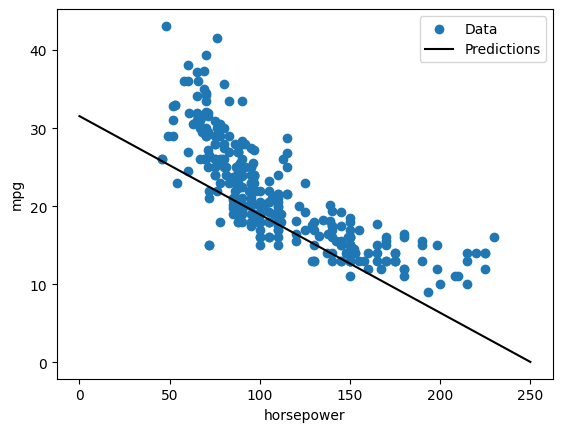

In [56]:
plot_HPvsMPG(hp1, mpg1, hp2, mpg2)

In [57]:
# Get final results for model1
testing = model1.evaluate(testing_data['horsepower'], testing_data['mpg'], verbose=0)
training = pd.DataFrame(history1.history).iloc[99]['loss']
results = {}
results['Baseline'] = training, testing

In [58]:
pd.DataFrame(results, index = ['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.441559,10.466421


# 5) Improving the Model

In [59]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


## Model 2 (with Normalized data)

In [60]:
# Define model 2
model2 = tf.keras.Sequential()

# Define layer 1
layer1 = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['horsepower']))

# Define layer 2
layer2 = tf.keras.layers. Dense(1)

# Add layers
model2.add(layer1)
model2.add(layer2)

In [61]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [62]:
# Compile model2
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [63]:
history2 = model2.fit(
    training_data['horsepower'],
    training_data['mpg'],
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

8/8 [==============================] - 0s 962us/step


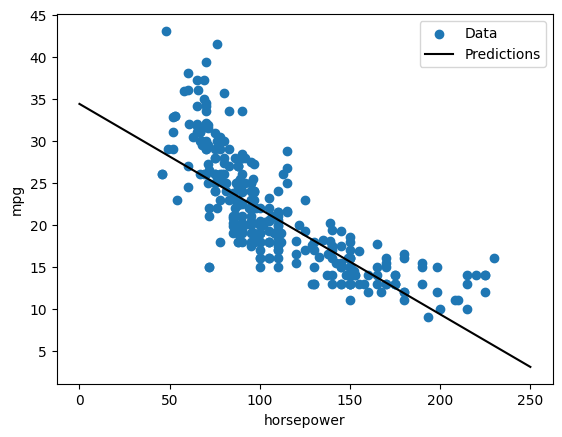

In [64]:
#Real Data
hp1 = training_data['horsepower']
mpg1 = training_data['mpg']

# predicted values
hp2=tf.linspace(0, 250, 251)
mpg2 = model2.predict(hp2)
plot_HPvsMPG(hp1, mpg1, hp2, mpg2)

In [65]:
# Get final results for model1
testing = model2.evaluate(testing_data['horsepower'], testing_data['mpg'], verbose=0)
training = pd.DataFrame(history2.history).iloc[99]['loss']
results['Normalization'] = training, testing

In [66]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.441559,10.466421
Normalization,3.003866,7.773279


## Model 3 (With proper sampling)

In [67]:
# Random sample data
training_data = data.sample(frac=.8, random_state=0)
testing_data = data.drop(training_data.index)

In [68]:
training_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
55,27.0,4,97.0,60,1834,19.0,1971
125,20.0,6,198.0,95,3102,16.5,1974
356,32.4,4,108.0,75,2350,16.8,1981
178,23.0,4,120.0,88,2957,17.0,1975
287,16.5,8,351.0,138,3955,13.2,1979


In [69]:
testing_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
9,15.0,8,390.0,190,3850,8.5,1970
25,10.0,8,360.0,215,4615,14.0,1970
28,9.0,8,304.0,193,4732,18.5,1970
31,25.0,4,113.0,95,2228,14.0,1971
33,19.0,6,232.0,100,2634,13.0,1971


In [70]:
# Define model 3
model3 = tf.keras.Sequential()

# Define layer 1
layer1 = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['horsepower']))

# Define layer 2
layer2 = tf.keras.layers. Dense(1)

# Add layers
model3.add(layer1)
model3.add(layer2)

In [71]:
tf.keras.utils.plot_model(model3, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [72]:
# Compile model3
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [73]:
history3 = model3.fit(
    training_data['horsepower'],
    training_data['mpg'],
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

8/8 [==============================] - 0s 2ms/step


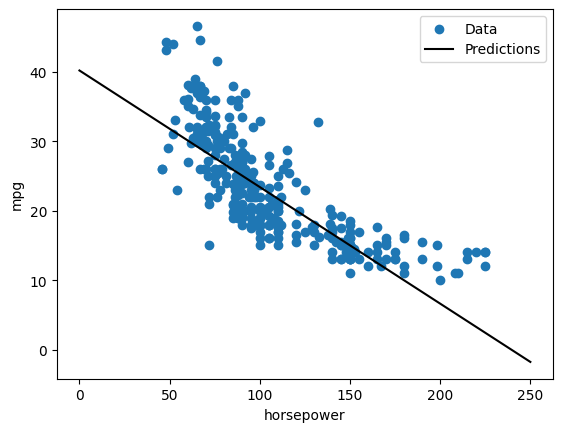

In [74]:
#Real Data
hp1 = training_data['horsepower']
mpg1 = training_data['mpg']

# predicted values
hp2=tf.linspace(0, 250, 251)
mpg2 = model3.predict(hp2)
plot_HPvsMPG(hp1, mpg1, hp2, mpg2)

In [75]:
# Get final results for model1
testing = model3.evaluate(testing_data['horsepower'], testing_data['mpg'], verbose=0)
training = pd.DataFrame(history3.history).iloc[99]['loss']
results['Sampling'] = training, testing

In [76]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.441559,10.466421
Normalization,3.003866,7.773279
Sampling,3.768424,4.042091


## Model 4 (using Deep Learning)

In [77]:
# Define Model 4
model4 = tf.keras.Sequential()

#Define Layer 1
layer1 =tf.keras.layers.Normalization(input_shape=[1,], axis=None)
layer1.adapt(np.array(training_data['horsepower']))

# Define layer 2
layer2 = tf.keras.layers.Dense(64, activation='relu')

#Define layer 3
layer3 = tf.keras.layers.Dense(64, activation='relu')

#Define layer 4
layer4 = tf.keras.layers.Dense(1)

# Add layers
model4.add(layer1)
model4.add(layer2)
model4.add(layer3)
model4.add(layer4)


In [78]:
# Compile model4
model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [79]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [80]:
history4 = model4.fit(
    training_data['horsepower'],
    training_data['mpg'],
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

8/8 [==============================] - 0s 1ms/step


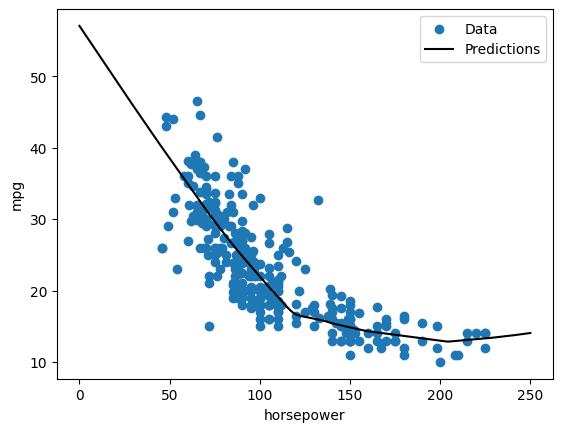

In [81]:
#Real Data
hp1 = training_data['horsepower']
mpg1 = training_data['mpg']

# predicted values
hp2=tf.linspace(0, 250, 251)
mpg2 = model4.predict(hp2)
plot_HPvsMPG(hp1, mpg1, hp2, mpg2)

In [82]:
# Get final results for model4
testing = model4.evaluate(testing_data['horsepower'], testing_data['mpg'], verbose=0)
training = pd.DataFrame(history4.history).iloc[99]['loss']
results['DeepLearning'] = training, testing

In [83]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.441559,10.466421
Normalization,3.003866,7.773279
Sampling,3.768424,4.042091
DeepLearning,3.183673,3.529387


## Model 5 (Deep Learning with multiple features)

In [84]:
# Define training data
training_data = data.sample(frac=.8, random_state=0)
training_features = training_data.drop("mpg", axis=1)
training_labels = training_data['mpg']

In [85]:
# Define testing data
testing_data = training_data.drop(training_data.index)
testing_features = training_data.drop("mpg", axis=1)
testing_labels = training_data['mpg']

In [86]:
training_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
55,27.0,4,97.0,60,1834,19.0,1971
125,20.0,6,198.0,95,3102,16.5,1974
356,32.4,4,108.0,75,2350,16.8,1981
178,23.0,4,120.0,88,2957,17.0,1975
287,16.5,8,351.0,138,3955,13.2,1979
...,...,...,...,...,...,...,...
282,22.3,4,140.0,88,2890,17.3,1979
230,15.5,8,350.0,170,4165,11.4,1977
151,31.0,4,79.0,67,2000,16.0,1974
145,32.0,4,83.0,61,2003,19.0,1974


In [87]:
# Define Model 5
model5 = tf.keras.Sequential()

#Define Layer 1
layer1 =tf.keras.layers.Normalization(axis=-1)
layer1.adapt(np.array(training_features))

# Define layer 2
layer2 = tf.keras.layers.Dense(64, activation='relu')

#Define layer 3
layer3 = tf.keras.layers.Dense(64, activation='relu')

#Define layer 4
layer4 = tf.keras.layers.Dense(1)

# Add layers
model5.add(layer1)
model5.add(layer2)
model5.add(layer3)
model5.add(layer4)


In [88]:
# Compile model5
model5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [89]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4686 (18.31 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [90]:
history5 = model5.fit(
    training_features,
    training_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

In [91]:
# Get final results for model5
testing = model5.evaluate(testing_features, testing_labels, verbose=0)
training = pd.DataFrame(history5.history).iloc[99]['loss']
results['MultipleVariables'] = training, testing

In [92]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.441559,10.466421
Normalization,3.003866,7.773279
Sampling,3.768424,4.042091
DeepLearning,3.183673,3.529387
MultipleVariables,1.770473,1.806306


# Further Steps

# Hyperparameter tuning

In [93]:
# Number of layers, more nodes, picking optimizers, adjusting learning rate, adjust and test

## Save your model


In [94]:
model5.save('mpg_model_5')

INFO:tensorflow:Assets written to: mpg_model_5/assets


INFO:tensorflow:Assets written to: mpg_model_5/assets


# 6) Cylinder Model

In [96]:
# This is a new model meant to use the same concpets but for cylinders not miles per gallon. This is no longer covered in the GCAcademy tutorial
# Define training data
training_data = data.sample(frac=.8, random_state=0)
training_features = training_data.drop("cylinders", axis=1)
training_labels = training_data['cylinders']

In [98]:
# Define testing data
testing_data = training_data.drop(training_data.index)
testing_features = training_data.drop("cylinders", axis=1)
testing_labels = training_data['cylinders']

In [99]:
training_data


,mpg,cylinders,displacement,horsepower,weight,acceleration,year
55,27.0,4,97.0,60,1834,19.0,1971
125,20.0,6,198.0,95,3102,16.5,1974
356,32.4,4,108.0,75,2350,16.8,1981
178,23.0,4,120.0,88,2957,17.0,1975
287,16.5,8,351.0,138,3955,13.2,1979
...,...,...,...,...,...,...,...
282,22.3,4,140.0,88,2890,17.3,1979
230,15.5,8,350.0,170,4165,11.4,1977
151,31.0,4,79.0,67,2000,16.0,1974
145,32.0,4,83.0,61,2003,19.0,1974


In [102]:
# Define Model 6
model6 = tf.keras.Sequential()

#Define Layer 1
layer1 =tf.keras.layers.Normalization(axis=-1)
layer1.adapt(np.array(training_features))

# Define layer 2
layer2 = tf.keras.layers.Dense(64, activation='relu')

#Define layer 3
layer3 = tf.keras.layers.Dense(64, activation='relu')

#Define layer 4
layer4 = tf.keras.layers.Dense(1)

# Add layers
model6.add(layer1)
model6.add(layer2)
model6.add(layer3)
model6.add(layer4)


In [103]:
# Compile model6
model6.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [104]:
model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_15 (Dense)            (None, 64)                448       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4686 (18.31 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [105]:
history6 = model6.fit(
    training_features,
    training_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

In [106]:
# Get final results for model6
testing = model6.evaluate(testing_features, testing_labels, verbose=0)
training = pd.DataFrame(history6.history).iloc[99]['loss']
results['Cylinders'] = training, testing

In [107]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.441559,10.466421
Normalization,3.003866,7.773279
Sampling,3.768424,4.042091
DeepLearning,3.183673,3.529387
MultipleVariables,1.770473,1.806306
Cylinders,0.228895,0.233154


# 7) more adjustments

In [108]:
# Training data is the same as previous step so won't be repeated
training_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
55,27.0,4,97.0,60,1834,19.0,1971
125,20.0,6,198.0,95,3102,16.5,1974
356,32.4,4,108.0,75,2350,16.8,1981
178,23.0,4,120.0,88,2957,17.0,1975
287,16.5,8,351.0,138,3955,13.2,1979
...,...,...,...,...,...,...,...
282,22.3,4,140.0,88,2890,17.3,1979
230,15.5,8,350.0,170,4165,11.4,1977
151,31.0,4,79.0,67,2000,16.0,1974
145,32.0,4,83.0,61,2003,19.0,1974


In [109]:
# Define Model 7
model7 = tf.keras.Sequential()

#Define Layer 1
layer1 =tf.keras.layers.Normalization(axis=-1)
layer1.adapt(np.array(training_features))

# Define layer 2
layer2 = tf.keras.layers.Dense(64, activation='relu')

#Define layer 3
layer3 = tf.keras.layers.Dense(64, activation='relu')

#Define layer 4
layer4 = tf.keras.layers.Dense(1)

# Add layers
model7.add(layer1)
model7.add(layer2)
model7.add(layer3)
model7.add(layer4)

In [113]:
# Compile model7
# changing the learning rate
model7.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    loss='mean_absolute_error')

In [114]:
model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_18 (Dense)            (None, 64)                448       
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4686 (18.31 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [115]:
history7 = model7.fit(
    training_features,
    training_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2)

In [116]:
# Get final results for model7
testing = model7.evaluate(testing_features, testing_labels, verbose=0)
training = pd.DataFrame(history7.history).iloc[99]['loss']
results['Cylinders2'] = training, testing

In [117]:
pd.DataFrame(results, index=['training loss', 'testing loss']).T

,training loss,testing loss
Baseline,3.441559,10.466421
Normalization,3.003866,7.773279
Sampling,3.768424,4.042091
DeepLearning,3.183673,3.529387
MultipleVariables,1.770473,1.806306
Cylinders,0.228895,0.233154
Cylinders2,0.135117,0.149296
